## The cells here are for image visualization. Skip below for image scaling

In [1]:
import cv2
import pandas as pd
from PIL import Image

In [2]:
prefix = ''
full_labels = pd.read_csv(prefix + './compiled_traffic_lights.csv')
full_labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,./Simulation/frame0579.jpg,800,600,Red,43,564,59,591
1,./Simulation/frame0585.jpg,800,600,Red,362,548,379,582
2,./Simulation/frame0154.jpg,800,600,Yellow,55,178,137,343
3,./Simulation/frame0143.jpg,800,600,Green,527,235,596,389
4,./Simulation/frame0168.jpg,800,600,Red,345,506,372,566


In [3]:
def draw_boxes(image_name):
    selected_value = full_labels[full_labels.filename == image_name]
    img = cv2.imread(image_name)
    for index, row in selected_value.iterrows():
        print(row['xmin'], row['ymin'], row['xmax'], row['ymax'])
        img = cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (0, 255, 0), 3)
    return img

671 204 744 370
365 192 440 359
56 176 126 349


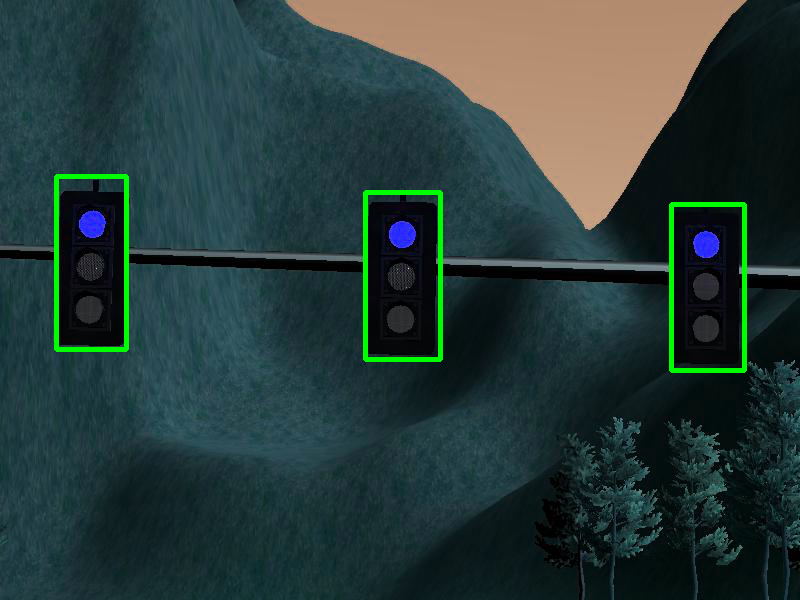

In [4]:
import matplotlib.pyplot as plt
import numpy as np

Image.fromarray(draw_boxes(prefix +'./Simulation/frame0369.jpg'))

5 17 66 163


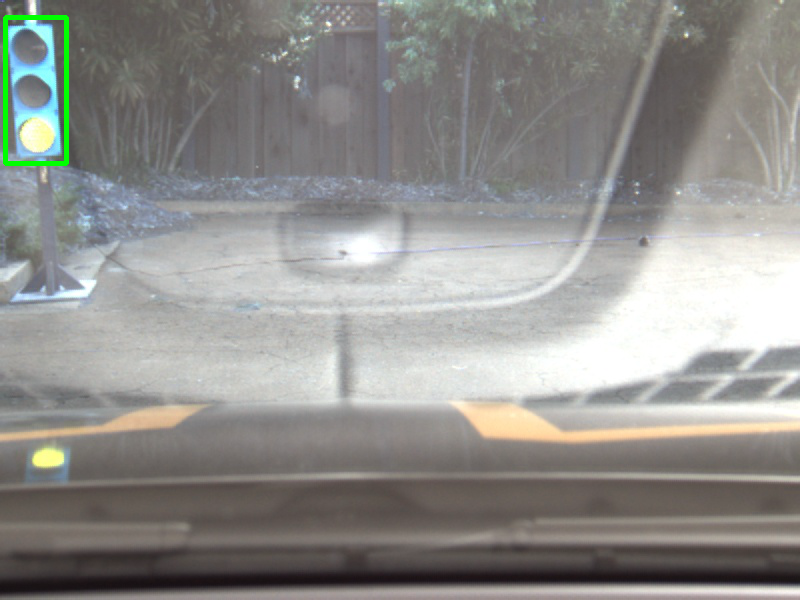

In [5]:
Image.fromarray(draw_boxes(prefix +'./RosBag/frame0441.jpg'))

5 17 66 163


<IPython.core.display.Javascript object>


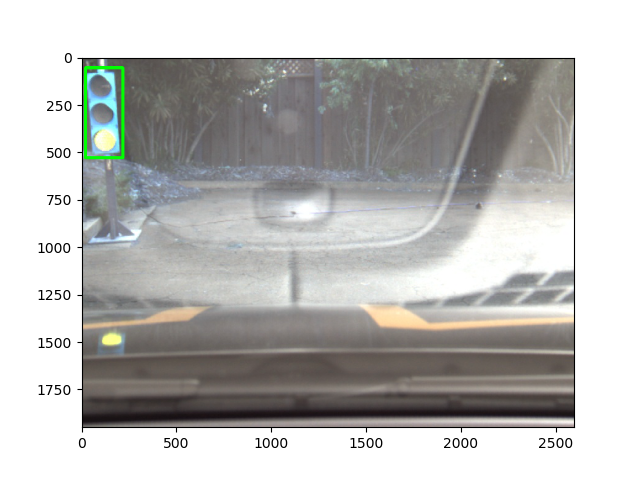

5 17 66 163
0.0203125 0.268125 0.09208333333333332 0.8829166666666667


<IPython.core.display.Javascript object>


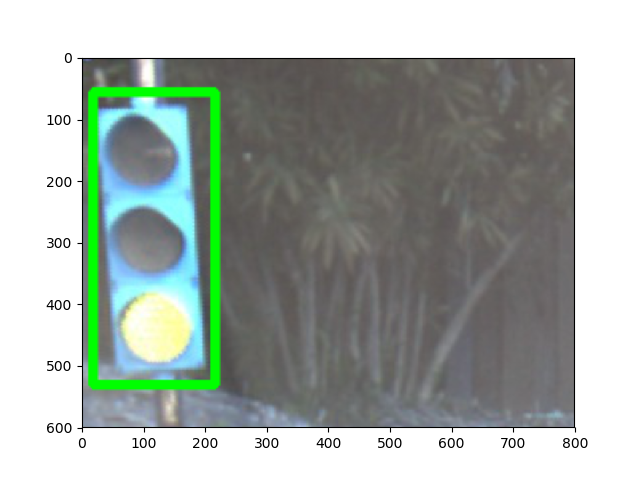

0.0019230769230769232 -0.07487179487179488
Center (0.044375, 0.15) :: 0 800 0 600
Saved to  ./generated/0.png


In [6]:
%matplotlib nbagg
SCALE = 3.25
img =draw_boxes(prefix +'./RosBag/frame0441.jpg')
# img = cv2.imread(prefix +'./Simulation/frame0369.jpg')
img = cv2.resize(img,(int(800*SCALE),int(600*SCALE)))
plt.figure()
plt.imshow(img)

selected_value = full_labels[full_labels.filename == './RosBag/frame0441.jpg']

def norm(xmin,ymin,xmax,ymax, width,height):
    xmin = xmin / width
    xmax = xmax / width
    ymax = ymax / height
    ymin = ymin / height
    return xmin,ymin,xmax,ymax

def getNormCenter(xmin,ymin,xmax,ymax, width, height):
    
    xmin,ymin,xmax,ymax = norm(xmin,ymin,xmax,ymax, width, height)
    
    return float((xmax - xmin)/2 + xmin), float((ymax - ymin)/2 + ymin)

def getEquivalentScaledIndices(scale, center, height, width):
    x_center = center[0]
    
    if x_center > 0.5/scale:
        x_start = x_center - 0.5/scale
        x_end = x_center + 0.5/scale
        if x_end > 1:
            x_end = 1
            x_start = 1 - 1/scale
    else:
        x_start = 0
        x_end = x_start + 1.0/scale
    
    y_center = center[1]
    
    if y_center > 0.5/scale:
        y_start = y_center - 0.5/scale
        y_end = y_center + 0.5/scale
    else:
        y_start = 0
        y_end = y_start + 1.0/scale

    return x_start,x_end,y_start,y_end
    
count = 0
for index, row in selected_value.iterrows():
    width = 800
    height = 600
    print(row['xmin'], row['ymin'], row['xmax'], row['ymax'])
    
    center = getNormCenter(row['xmin'], row['ymin'], row['xmax'], row['ymax'],width,height)
    x_start,x_end,y_start,y_end = getEquivalentScaledIndices(SCALE,center,width,height)
    
    box_width = (row['xmax'] - row['xmin']) / width
    box_height = (row['ymin'] - row['ymax']) / height
    
    x_dst = row['xmin']/width/SCALE - x_start
    
    new_x_min = (row['xmin']/width - x_start)*SCALE
    new_x_max  = (row['xmax']/width - x_start)*SCALE 
    new_y_min = (row['ymin']/height - y_start)*SCALE 
    new_y_max = (row['ymax']/height - y_start)*SCALE 
    
    min_margin = 0.02
    max_margin = 0.98
    if new_x_min <= min_margin or new_x_min >= max_margin:
        continue
    if new_x_max <= min_margin or new_x_max >= max_margin:
        continue
    if new_y_min <= min_margin or new_y_min >= max_margin:
        continue
    if new_y_max <= min_margin or new_y_max >= max_margin:
        continue
        
    print(new_x_min,new_x_max,new_y_min,new_y_max)
    
    x_start = int(x_start*width*SCALE)
    x_end = int(x_end*width*SCALE)
    
    y_start = int(y_start*height*SCALE)
    y_end = int(y_end*height*SCALE)
    
    new_img = img[y_start:y_end,x_start:x_end]
    
    new_img = cv2.rectangle(new_img, (int(new_x_min*width), int(new_y_min*height)), (int(new_x_max*width), int(new_y_max*height)), (0, 255, 0), 3)
    plt.figure()
    plt.imshow(new_img)
    print(x_dst , box_height/SCALE-y_start)
    
    print('Center',center,'::',x_start,x_end,y_start,y_end)
    
    genFile = './generated/' + str(count) + '.png'
    im = Image.fromarray(new_img)
    im.save(genFile)
    print('Saved to ', genFile)
    count += 1


## Use the below setting to scale the images

In [7]:
import cv2
import pandas as pd
from PIL import Image

# Set this to the root of where the data is located
prefix = ''
full_labels = pd.read_csv(prefix + './sim_compiled_traffic_lights.csv')
full_labels.head()

combinedData = []

In [8]:
from random import shuffle
import matplotlib.pyplot as plt

def getEquivalentScaledIndices(scale, center, height, width):
    x_center = center[0]
    
    if x_center > 0.5/scale:
        x_start = x_center - 0.5/scale
        x_end = x_center + 0.5/scale
        if x_end > 1:
            x_end = 1
            x_start = 1 - 1/scale
    else:
        x_start = 0
        x_end = x_start + 1.0/scale
    
    y_center = center[1]
    
    if y_center > 0.5/scale:
        y_start = y_center - 0.5/scale
        y_end = y_center + 0.5/scale
    else:
        y_start = 0
        y_end = y_start + 1.0/scale

    return x_start,x_end,y_start,y_end

def norm(xmin,ymin,xmax,ymax, width,height):
    xmin = xmin / width
    xmax = xmax / width
    ymax = ymax / height
    ymin = ymin / height
    return xmin,ymin,xmax,ymax

def getNormCenter(xmin,ymin,xmax,ymax, width, height):
    xmin,ymin,xmax,ymax = norm(xmin,ymin,xmax,ymax, width, height)
    return float((xmax - xmin)/2 + xmin), float((ymax - ymin)/2 + ymin)

def clamp(value, mx):
    return max(min(value, mx*0.98), mx*0.02)

def extractBoxes(imgPath, width, height, count=0, SCALE=1.0):
    labelData = []
    selected_value = full_labels[full_labels.filename == imgPath]
    img = cv2.imread(imgPath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(int(width*SCALE),int(height*SCALE)))

    for index, row in selected_value.iterrows():
        width = 800
        height = 600
        center = getNormCenter(row['xmin'], row['ymin'], row['xmax'], row['ymax'],width,height)
        x_start,x_end,y_start,y_end = getEquivalentScaledIndices(SCALE,center,width,height)

        box_width = (row['xmax'] - row['xmin']) / width
        box_height = (row['ymin'] - row['ymax']) / height

        x_dst = row['xmin']/width/SCALE - x_start

        new_x_min = clamp((row['xmin']/width - x_start)*SCALE, 1.0)
        new_x_max  = clamp((row['xmax']/width - x_start)*SCALE , 1.0)

        new_y_min = clamp((row['ymin']/height - y_start)*SCALE , 1.0)
        new_y_max = clamp((row['ymax']/height - y_start)*SCALE ,1.0)
#         new_y_max = clamp((row['ymin']/height - y_start)*SCALE , 1.0)
#         new_y_min = clamp((row['ymax']/height - y_start)*SCALE ,1.0)

        # Skip if box is not fully contained in the image
        min_margin = 15
        x_max_margin = 785
        y_max_margin = 585
        if new_x_min*width <= min_margin or new_x_min*width >= x_max_margin:
            continue
        if new_x_max*width <= min_margin or new_x_max*width >= x_max_margin:
            continue
        if new_y_min*height <= min_margin or new_y_min*height >= y_max_margin:
            continue
        if new_y_max*height <= min_margin or new_y_max*height >= y_max_margin:
            continue
        # Skip if the coordinates get inverted (somehow)
        if new_x_min >= new_x_max:
            continue
        if new_y_min >= new_y_max:
            continue
        
        if False:
            # Filter out small labels
            if abs(new_x_max - new_x_min)*width < 120 or abs(new_y_max-new_y_min)*height < 90:
                continue
        
        x_start = int(x_start*width*SCALE)
        x_end = int(x_end*width*SCALE)

        y_start = int(y_start*height*SCALE)
        y_end = int(y_end*height*SCALE)

        new_img = img[y_start:y_end,x_start:x_end]

        genFile = prefix + './generated/scale_' + str(SCALE) + '_' + str(count) + '.png'
        # Use matplotlib to save the images
        plt.imsave(genFile,new_img)

        count += 1
                
        labelData.append((genFile,width,height,row['class'],int(new_x_min*width), int(new_y_min*height), int(new_x_max*width), int(new_y_max*height)))
    return labelData, count


cnt=0
allData = []
for f in full_labels['filename']:
    dta, cnt = extractBoxes(f, 800, 600, count=cnt, SCALE=1.0)
    allData.append(dta)

for f in full_labels['filename']:
    dta, cnt = extractBoxes(f, 800, 600, count=cnt, SCALE=1.5)
    allData.append(dta)
    
# for f in full_labels['filename']:
#     dta, cnt = extractBoxes(f, 800, 600, count=cnt, SCALE=2.0)
#     allData.append(dta)
    
# for f in full_labels['filename']:
#     dta, cnt = extractBoxes(f, 800, 600, count=cnt, SCALE=2.5)
#     allData.append(dta)
    
# for f in full_labels['filename']:
#     dta, cnt = extractBoxes(f, 800, 600, count=cnt, SCALE=3)
#     allData.append(dta)
    
# for f in full_labels['filename']:
#     dta, cnt = extractBoxes(f, 800, 600, count=cnt, SCALE=3.25)
#     allData.append(dta)
    
# # This is to get the rosbag red traffic lights, they are typicaly not getting picked up...
# for f in full_labels['filename']:
#     dta, cnt = extractBoxes(f, 800, 600, count=cnt, SCALE=3.5)
#     allData.append(dta)
    
# for f in full_labels['filename']:
#     dta, cnt = extractBoxes(f, 800, 600, count=cnt, SCALE=3.75)
#     allData.append(dta)

# for f in full_labels['filename']:
#     dta, cnt = extractBoxes(f, 800, 600, count=cnt, SCALE=4)
#     allData.append(dta)
    
print(allData)
shuffle(allData)
# Add to outer list
for d in allData:
    combinedData.append(d)


[[('./generated/scale_1.0_0.png', 800, 600, 'Green', 369, 229, 438, 371), ('./generated/scale_1.0_1.png', 800, 600, 'Green', 105, 227, 172, 372), ('./generated/scale_1.0_2.png', 800, 600, 'Green', 640, 229, 706, 370)], [('./generated/scale_1.0_3.png', 800, 600, 'Green', 315, 263, 351, 336), ('./generated/scale_1.0_4.png', 800, 600, 'Green', 178, 263, 214, 337), ('./generated/scale_1.0_5.png', 800, 600, 'Green', 37, 261, 73, 338)], [('./generated/scale_1.0_6.png', 800, 600, 'Green', 383, 153, 459, 324), ('./generated/scale_1.0_7.png', 800, 600, 'Green', 37, 136, 120, 309), ('./generated/scale_1.0_8.png', 800, 600, 'Green', 711, 168, 784, 337)], [('./generated/scale_1.0_9.png', 800, 600, 'Yellow', 421, 263, 453, 337), ('./generated/scale_1.0_10.png', 800, 600, 'Yellow', 131, 262, 167, 337), ('./generated/scale_1.0_11.png', 800, 600, 'Yellow', 278, 262, 311, 337)], [('./generated/scale_1.0_12.png', 800, 600, 'Red', 250, 252, 296, 347), ('./generated/scale_1.0_13.png', 800, 600, 'Red', 433

In [21]:
shuffle(combinedData)
#First 30 as test set
testEntry = 'filename,width,height,class,xmin,ymin,xmax,ymax\n'
for dd in combinedData[0:400]:
    for d in dd:
        testEntry += d[0] + ',' + str(d[1]) + ','+ str(d[2]) + ','+ d[3] + ','+ str(d[4]) + ','+ str(d[5]) + ','+ str(d[6]) + ','+ str(d[7]) + '\n'
print (testEntry)

# Remaining as train set
trainEntry = 'filename,width,height,class,xmin,ymin,xmax,ymax\n'
for dd in combinedData[400:-1]:
    for d in dd:
        trainEntry += d[0] + ',' + str(d[1]) + ','+ str(d[2]) + ','+ d[3] + ','+ str(d[4]) + ','+ str(d[5]) + ','+ str(d[6]) + ','+ str(d[7]) + '\n'
    
print (trainEntry)

with open(prefix+'compiled_traffic_lights_test.csv', 'w') as the_file:
    the_file.write(testEntry)
    
with open(prefix+'compiled_traffic_lights_train.csv', 'w') as the_file:
    the_file.write(trainEntry)

filename,width,height,class,xmin,ymin,xmax,ymax
./generated/scale_3.25_618.png,800,600,Red,380,30,618,569
./generated/scale_3.25_619.png,800,600,Red,278,28,521,571
./generated/scale_3.25_620.png,800,600,Red,182,18,409,581
./generated/scale_3.75_1044.png,800,600,Green,338,159,461,440
./generated/scale_3.75_890.png,800,600,Red,302,91,497,508
./generated/scale_3.75_891.png,800,600,Red,310,84,489,515
./generated/scale_3.75_892.png,800,600,Red,300,91,499,508
./generated/scale_2.0_81.png,800,600,Green,18,174,138,424
./generated/scale_2.0_82.png,800,600,Green,338,177,461,422
./generated/scale_3.5_857.png,800,600,Green,192,67,392,532
./generated/scale_2.0_48.png,800,600,Red,542,133,688,465
./generated/scale_2.0_49.png,800,600,Red,324,132,475,467
./generated/scale_2.0_50.png,800,600,Red,112,127,252,473
./generated/scale_3.5_731.png,800,600,Red,289,53,510,546
./generated/scale_3.5_732.png,800,600,Red,284,58,515,541
./generated/scale_3.5_733.png,800,600,Red,276,51,510,548
./generated/scale_3.5_71

### Display some of the newly generated images with their bounding boxes

44 165 168 434


<IPython.core.display.Javascript object>


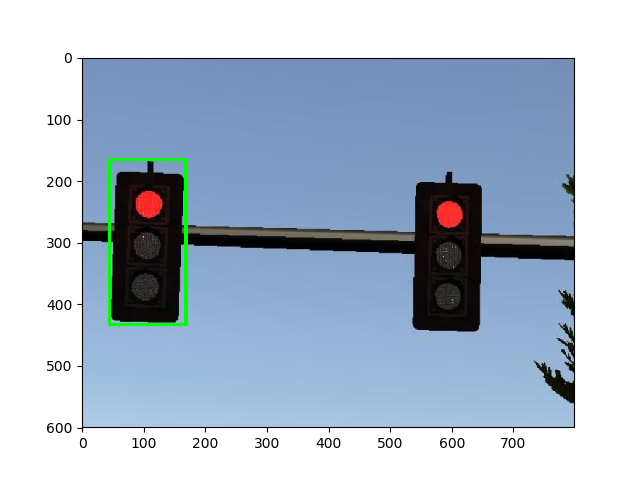

In [15]:
prefix = ''
full_labels = pd.read_csv(prefix + './compiled_traffic_lights_test.csv')
full_labels.head()

def draw_boxes(image_name):
    selected_value = full_labels[full_labels.filename == image_name]
    img = cv2.imread(image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for index, row in selected_value.iterrows():
        print(row['xmin'], row['ymin'], row['xmax'], row['ymax'])
        img = cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (0, 255, 0), 3)
    return img

import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

img = (draw_boxes(prefix +full_labels['filename'][0]))
plt.figure()
plt.imshow(img)

82 176 205 423


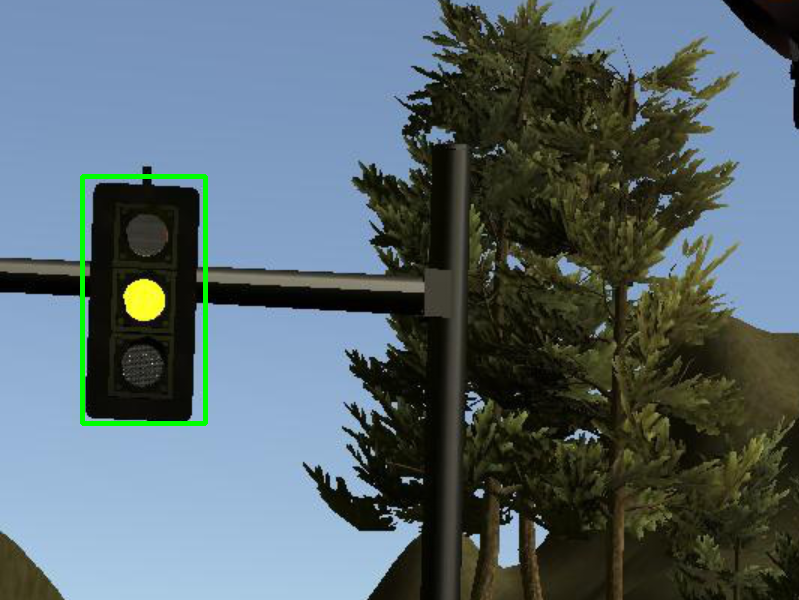

In [16]:
Image.fromarray(draw_boxes(prefix +full_labels['filename'][1]))

202 167 328 432


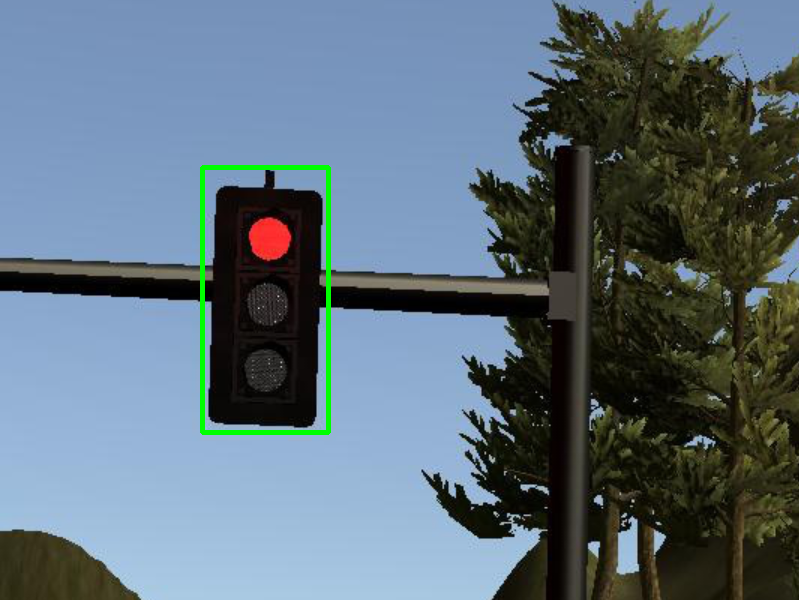

In [17]:
Image.fromarray(draw_boxes(prefix +full_labels['filename'][2]))